<a href="https://colab.research.google.com/github/KarimovRD/new/blob/main/Car_Plate_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Новый раздел

In [ ]:
!pip install tensorflow keras numpy matplotlib sklearn opencv-python

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Укажите пути к данным
train_dir = '/content/drive/MyDrive/Car_Plates_Dataset/train'
test_dir = '/content/drive/MyDrive/Car_Plates_Dataset/test'

# Нормализация и аугментация (увеличение данных)
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Нормализация (0-1)
    shear_range=0.2,         # Сдвиг
    zoom_range=0.2,          # Зум
    horizontal_flip=True)    # Горизонтальное отражение

test_datagen = ImageDataGenerator(rescale=1./255)  # Только нормализация

# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Все изображения 224x224
    batch_size=32,
    class_mode='categorical')  # Для многоклассовой классификации

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Car_Plates_Dataset/train'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
num_classes = len(train_generator.class_indices)

model = Sequential([
    # Первый свёрточный слой
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    # Второй свёрточный слой
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Третий свёрточный слой
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Полносвязные слои
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Для борьбы с переобучением
    Dense(num_classes, activation='softmax')  # 4 классов (стран)
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()  # Покажет структуру модели

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,  # Количество шагов на эпоху
    epochs=10,                                     # 10 проходов по данным
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1333 - loss: 1.3890

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.1333 - loss: 1.3890 - val_accuracy: 0.2308 - val_loss: 7.5249
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 4.8979 - val_accuracy: 0.2308 - val_loss: 5.0104
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1333 - loss: 4.4680 - val_accuracy: 0.1538 - val_loss: 3.6868
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3333 - loss: 3.4353 - val_accuracy: 0.1538 - val_loss: 1.6492
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4000 - loss: 1.6871 - val_accuracy: 0.3846 - val_loss: 1.3532
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4667 - loss: 1.2475 - val_accuracy: 0.2308 - val_loss: 1.3884
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5333 - loss: 1.2660 - val_accuracy: 0.2308 - val_loss: 1.4721
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 1.2791 - val_accuracy: 0.2308 - val_loss: 1.5153
Epoch 9/10
1/1 ━━━━━━━━━━

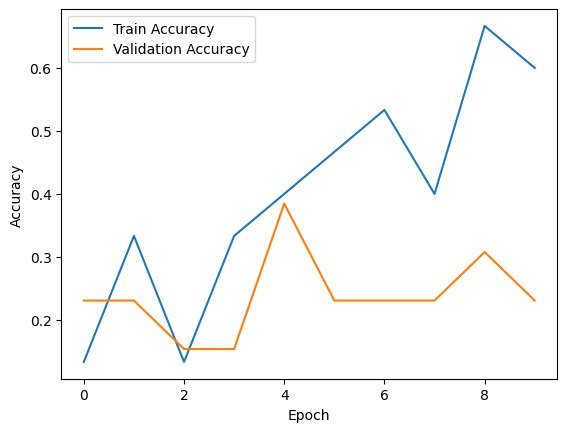

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Предсказания модели
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Вывод отчёта
print(classification_report(test_generator.classes, y_pred,
                          target_names=test_generator.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
              precision    recall  f1-score   support

      Russia       0.00      0.00      0.00         3
 Switzerland       0.30      1.00      0.46         3
      Turkey       0.67      0.40      0.50         5
         USA       0.00      0.00      0.00         2

    accuracy                           0.38        13
   macro avg       0.24      0.35      0.24        13
weighted avg       0.33      0.38      0.30        13



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.save('/content/drive/MyDrive/Car_Plates_Dataset/car_plate_model.h5')